dict_keys(['RMS_Hal_edge_state_750_1500_k_site_82.txt'])
dict_keys(['b5_large', 'b15_large', 'b25_large', 'b28_large', 'b41_large', 'b43_large', 'b49_large', 'b62_large'])
dict_keys(['b5_large', 'b15_large', 'b25_large', 'b28_large', 'b41_large', 'b43_large', 'b49_large', 'b62_large', 'RMS_Hal_edge_state_750_1500_k_site_85.txt'])
dict_keys(['b5_large', 'b15_large', 'b25_large', 'b28_large', 'b41_large', 'b43_large', 'b49_large', 'b62_large'])
dict_keys(['b5_large', 'b15_large', 'b25_large', 'b28_large', 'b41_large', 'b43_large', 'b49_large', 'b62_large', 'RMS_Hal_edge_state_750_1500_k_site_88.txt'])
dict_keys(['b5_large', 'b15_large', 'b25_large', 'b28_large', 'b41_large', 'b43_large', 'b49_large', 'b62_large'])
dict_keys(['b5_large', 'b15_large', 'b25_large', 'b28_large', 'b41_large', 'b43_large', 'b49_large', 'b62_large', 'RMS_Hal_edge_state_750_1500_k_site_91.txt'])
dict_keys(['b5_large', 'b15_large', 'b25_large', 'b28_large', 'b41_large', 'b43_large', 'b49_large', 'b62_large'])
dic

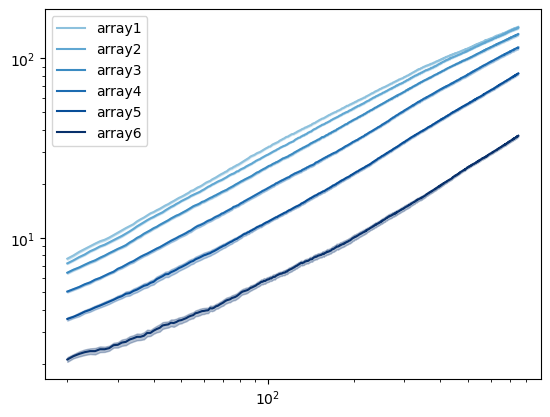

[array([  0.        ,   1.18282789,   1.52705656,   1.89800195,
         2.24619883,   2.56288691,   2.91909346,   3.252787  ,
         3.57715893,   3.88659079,   4.2146018 ,   4.52431556,
         4.94848773,   5.30924687,   5.65579663,   6.02890933,
         6.3579391 ,   6.67083027,   7.03072392,   7.33192042,
         7.67247625,   7.99078305,   8.37220739,   8.678801  ,
         8.99408116,   9.30431406,   9.58630982,   9.77658339,
        10.05542441,  10.38199626,  10.70501148,  11.01581874,
        11.35626247,  11.64707547,  11.93667323,  12.37338359,
        12.70507387,  13.0003254 ,  13.35974662,  13.72223224,
        13.95315958,  14.27658323,  14.53919076,  14.85555846,
        15.19235716,  15.44301794,  15.7917391 ,  16.07783818,
        16.39865373,  16.72450377,  16.96836575,  17.25029119,
        17.57284911,  17.85991305,  18.28704211,  18.44553232,
        18.79253502,  19.11540386,  19.33424363,  19.6326053 ,
        19.99987776,  20.34822528,  20.59482454,  20.8

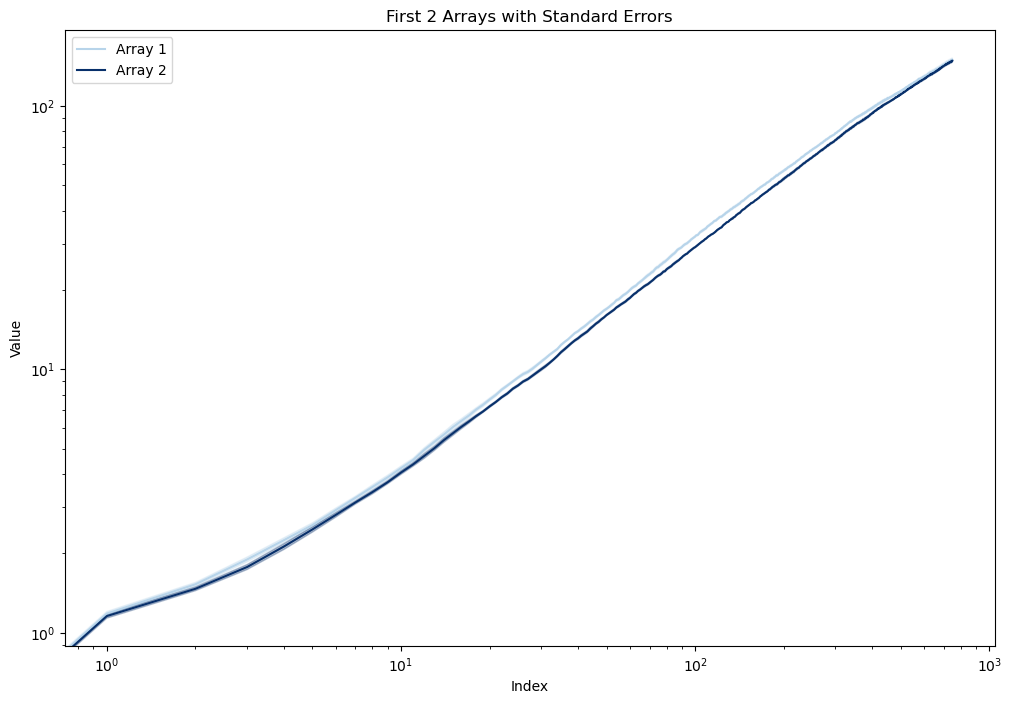

In [28]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/Hal_1500_LE_RMS_edge')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
for idx, site in enumerate(range(82, 100, 3), start=1):
    # Walk through the directory
    for root, dirs, files in os.walk(downloads_folder):
        # Filter out only the .txt files that match the pattern
        txt_files = [file for file in files if file.startswith(f'RMS_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

        # Load each file and store it in the dictionary
        for txt_file in txt_files:
            file_path = os.path.join(root, txt_file)
            data = np.loadtxt(file_path)
            le_ana_arrays[txt_file] = data

    # Print the keys of the dictionary to verify
    print(le_ana_arrays.keys())

    # Initialize a dictionary to store the arrays from each directory
    le_ana_arrays = {}

    # Loop through directories b0 to b95
    for i in range(96):
        dir_path = os.path.join(downloads_folder, f'b{i}')
        le_ana_large_path = os.path.join(dir_path, f'RMS_Hal_edge_state_750_1500_k_site_{site}.txt')
        
        if os.path.exists(le_ana_large_path):
            le_ana_large = np.loadtxt(le_ana_large_path)
            le_ana_arrays[f'b{i}_large'] = le_ana_large

    # Print the keys of the dictionary to verify
    print(le_ana_arrays.keys())

    # Convert the dictionary values to a numpy array for easier manipulation
    plot_data = np.array(list(le_ana_arrays.values()))

    # Calculate the average and standard error
    globals()[f'array{idx}'] = np.mean(plot_data, axis=0)
    globals()[f'standard_error{idx}'] = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

    # Plot the arrays using the blue color schemes
    colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
    plt.loglog(np.arange(20, len(globals()[f'array{idx}'])), globals()[f'array{idx}'][20:], label=f'array{idx}', color=colors[idx % len(colors)])
    plt.fill_between(np.arange(20, len(globals()[f'array{idx}'])), globals()[f'array{idx}'][20:] - globals()[f'standard_error{idx}'][20:], globals()[f'array{idx}'][20:] + globals()[f'standard_error{idx}'][20:], alpha=0.3, color=colors[idx % len(colors)])

plt.legend()
plt.show()

# Define the arrays and their standard errors
arrays = [array1, array2]
standard_errors = [standard_error1, standard_error2]
print(arrays)
labels = [f'Array {i+1}' for i in range(len(arrays))]
print(labels)

# Plot the arrays with their standard errors
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(arrays)))
print(colors)

for i, (array, std_err, label) in enumerate(zip(arrays, standard_errors, labels)):
    plt.loglog(np.arange(len(array)), array, label=label, color=colors[i])
    plt.fill_between(np.arange(len(array)), array - std_err, array + std_err, alpha=0.3, color=colors[i])

plt.title('First 2 Arrays with Standard Errors')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

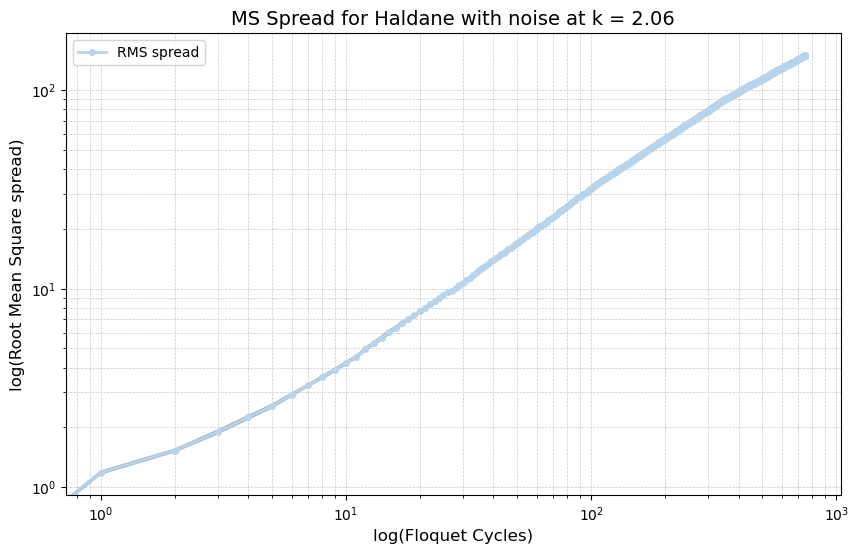

In [29]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array1)), array1, label="RMS spread", color=colors[0], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array1)), array1 - standard_error1, array1 + standard_error1, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('MS Spread for Haldane with noise at k = 2.06', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Root Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

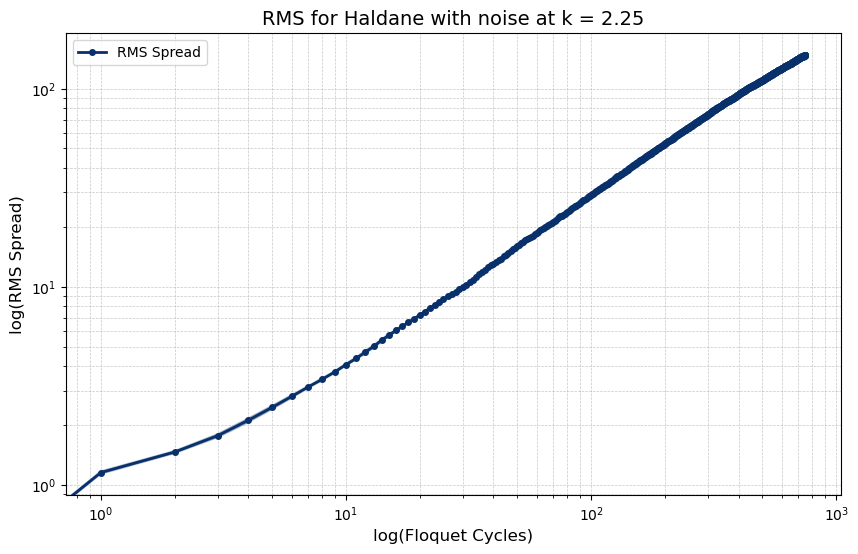

In [30]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array2)), array2, label="RMS Spread", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array2)), array2 - standard_error2, array2 + standard_error2, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('RMS for Haldane with noise at k = 2.25', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(RMS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

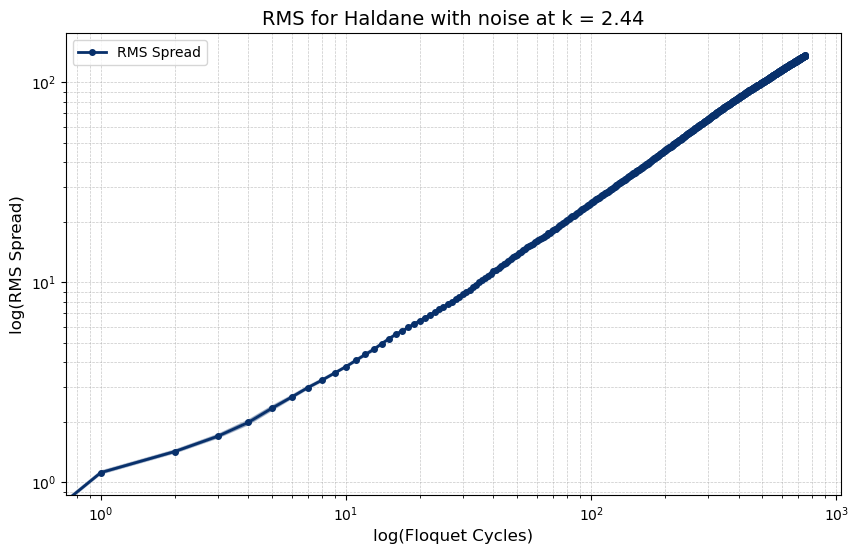

In [31]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array3)), array3, label="RMS Spread", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array3)), array3 - standard_error3, array3 + standard_error3, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('RMS for Haldane with noise at k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(RMS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

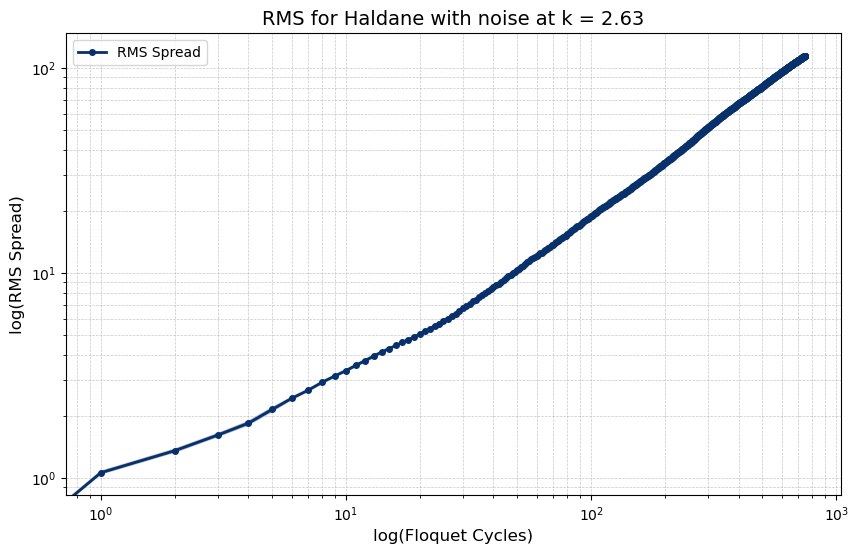

In [32]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array4)), array4, label="RMS Spread", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array4)), array4 - standard_error4, array4 + standard_error4, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('RMS for Haldane with noise at k = 2.63', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(RMS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/2055955259.py:5: RuntimeWarning: divide by zero encountered in log
  LE_Val_log = np.log(LE_Val)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/2055955259.py:6: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


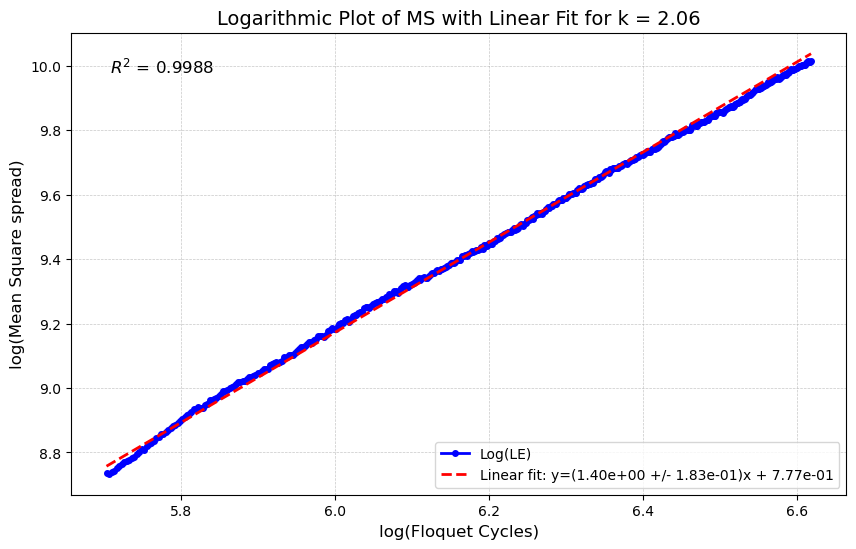

R^2 value of the linear fit: 0.9988
Linear fit parameters (0-150): slope = 1.40e+00, intercept = 7.77e-01


In [34]:
from scipy.optimize import curve_fit
LE_Val = array1
LE_Error = standard_error1
LE_Val = array1**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.06', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/1425645074.py:4: RuntimeWarning: divide by zero encountered in log
  LE_Val_log = np.log(LE_Val)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/1425645074.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


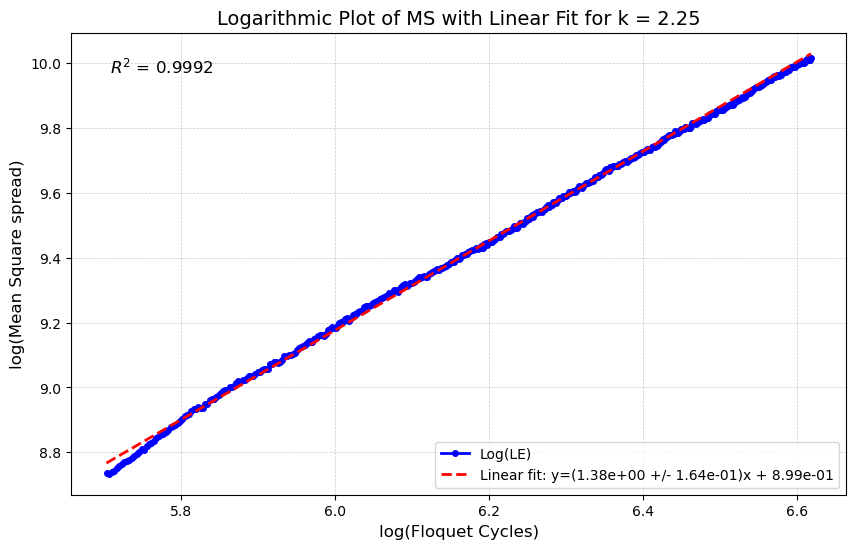

R^2 value of the linear fit: 0.9992
Linear fit parameters (0-150): slope = 1.38e+00, intercept = 8.99e-01


In [35]:
LE_Val = array2
LE_Error = standard_error2
LE_Val = array2**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.25', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/3519483694.py:4: RuntimeWarning: divide by zero encountered in log
  LE_Val_log = np.log(LE_Val)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/3519483694.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


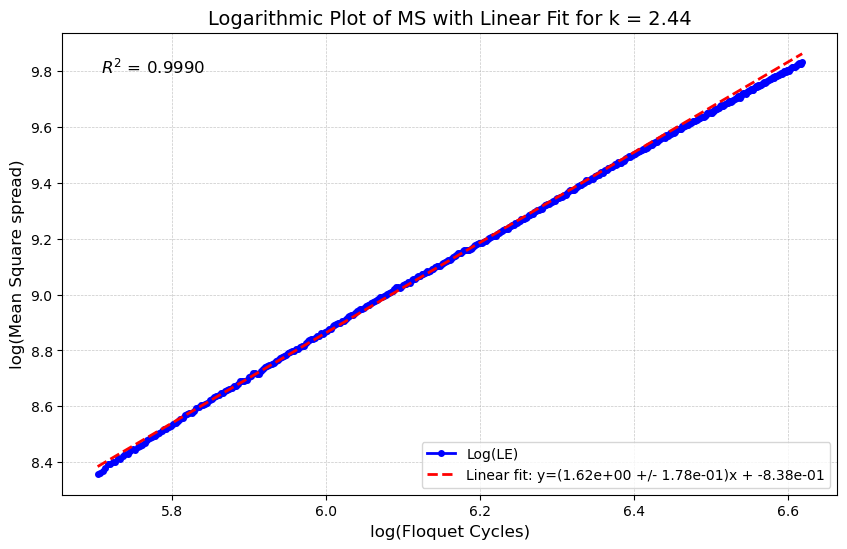

R^2 value of the linear fit: 0.9990
Linear fit parameters (0-150): slope = 1.62e+00, intercept = -8.38e-01


In [36]:
LE_Val = array3
LE_Error = standard_error3
LE_Val = array3**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/249343218.py:4: RuntimeWarning: divide by zero encountered in log
  LE_Val_log = np.log(LE_Val)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/249343218.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


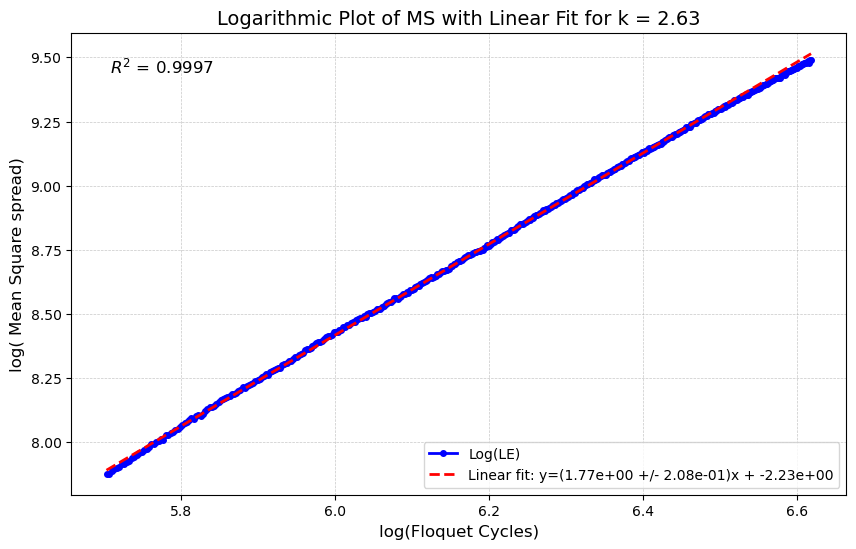

R^2 value of the linear fit: 0.9997
Linear fit parameters (0-150): slope = 1.77e+00, intercept = -2.23e+00


In [38]:
LE_Val = array4
LE_Error = standard_error4
LE_Val = array4**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.63', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log( Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


dict_keys(['RMS_Hal_edge_state_750_1500_k_site_99.txt'])
dict_keys(['b5_large', 'b15_large', 'b25_large', 'b28_large', 'b41_large', 'b43_large', 'b49_large', 'b62_large'])


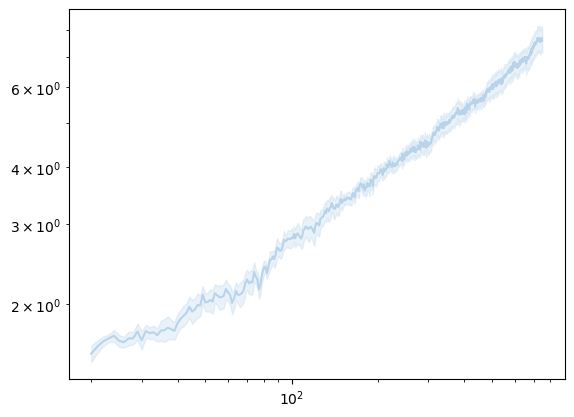

In [11]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/Hal_1500_LE_RMS_edge')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
site = 99
# Walk through the directory
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the pattern
    txt_files = [file for file in files if file.startswith(f'RMS_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Initialize a dictionary to store the arrays from each directory
le_ana_arrays = {}

# Loop through directories b0 to b95
for i in range(96):
    dir_path = os.path.join(downloads_folder, f'b{i}')
    le_ana_large_path = os.path.join(dir_path, f'RMS_Hal_edge_state_750_1500_k_site_{site}.txt')
    
    if os.path.exists(le_ana_large_path):
        le_ana_large = np.loadtxt(le_ana_large_path)
        le_ana_arrays[f'b{i}_large'] = le_ana_large

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the arrays using the blue color schemes
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(20, len(array99)), array99[20:], label='array99', color=colors[0])
plt.fill_between(np.arange(20, len(array99)), array99[20:] - standard_error99[20:], array99[20:] + standard_error99[20:], alpha=0.3, color=colors[0])


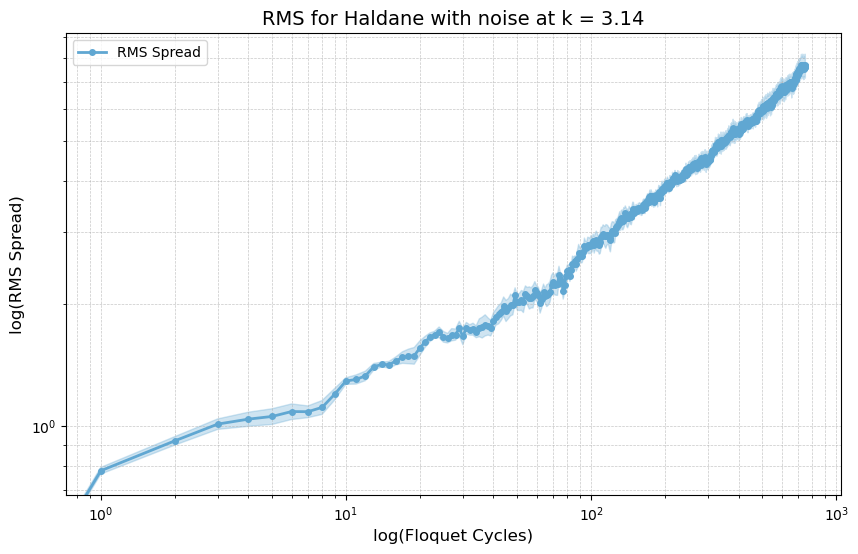

In [12]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array99)), array99, label="RMS Spread", color=colors[2], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[2])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('RMS for Haldane with noise at k = 3.14', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(RMS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/2628687430.py:4: RuntimeWarning: divide by zero encountered in log
  LE_Val_log = np.log(LE_Val)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/2628687430.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


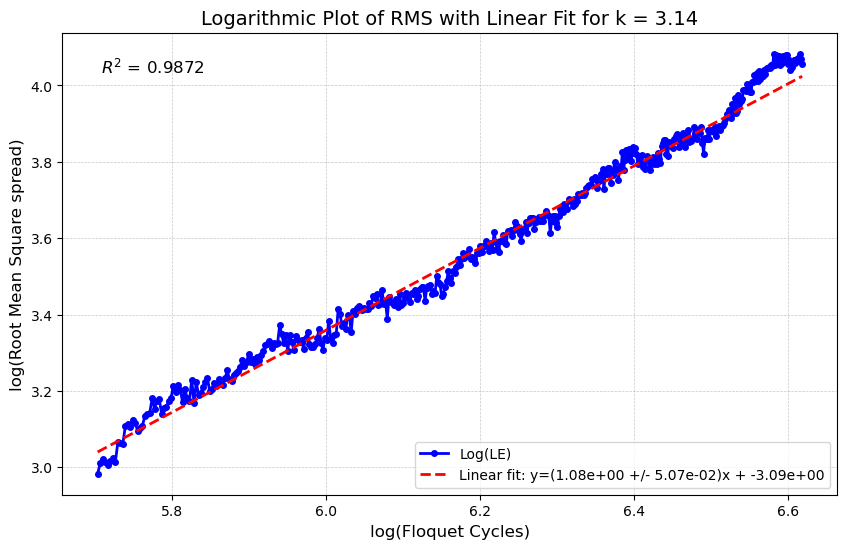

R^2 value of the linear fit: 0.9872
Linear fit parameters (0-150): slope = 1.08e+00, intercept = -3.09e+00


In [39]:
LE_Val = array99
LE_Error = standard_error99
LE_Val = array99**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of RMS with Linear Fit for k = 3.14', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Root Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


Standard deviation of the slope: 1.7599e-03


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/544487157.py:4: RuntimeWarning: divide by zero encountered in log
  LE_Val_log = np.log(LE_Val)
/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_31348/544487157.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


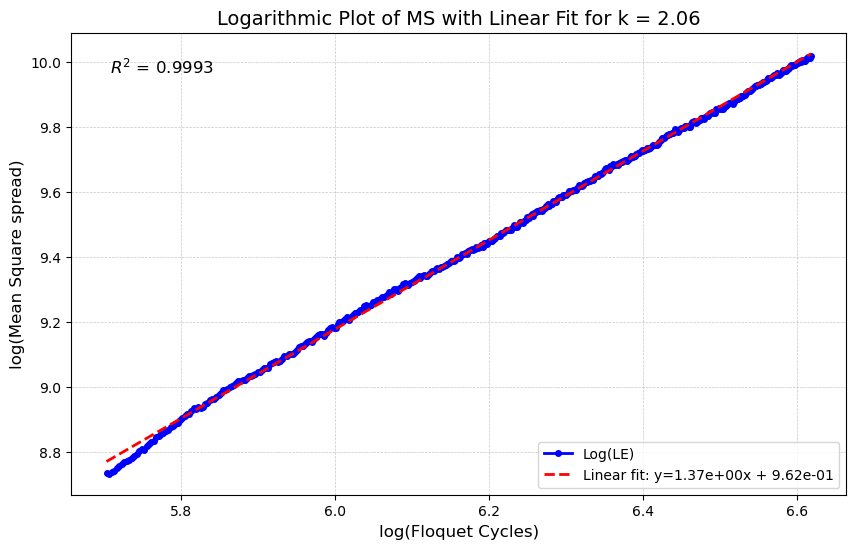

R^2 value of the linear fit: 0.9993
Linear fit parameters (0-150): slope = 1.37e+00, intercept = 9.62e-01


In [27]:
LE_Val = array1
LE_Error = standard_error1
LE_Val = array1**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
n = len(LE_Val_plot)

# Perform a linear fit from 0 to 300 time steps
slope_150, intercept_150 = np.polyfit(x_log_plot, LE_Val_plot, 1)
fitted_line_150 = slope_150 * x_log_plot + intercept_150

SSE = np.sum((LE_Val_plot - fitted_line_150) ** 2)

s = np.sqrt(SSE / (len(LE_Val_plot) - 2))

variance_eq = (n*s**2) / (n*(x_log_plot**2).sum() - (x_log_plot.sum())**2)

sd_slope = np.sqrt(variance_eq)

print(f"Standard deviation of the slope: {sd_slope:.4e}")

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y={slope_150:.2e}x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.06', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
